# 4.Evaluating Machine Learning Model Performance


## 4.1) Three ways to evaluate Scikit-learn models/estimators:

1. Estimator `score` method
2. The `scoring` parameter using `cross_val_score`
3. Problem specific metrics functions

## [4.2) Evaluating Classification Model and Evaluation Metrics](#4.2)
* Accuracy
* Area Under ROC curve
* Confusion Metrics
* Classfication Report


## [4.3) Evaluating Regression Model and Evaluation Metrics](#4.3)
* R2 Score
* MAE
* MSE, RMSE



In [1]:
import numpy as np
import pandas as pd

In [2]:
heart_disease = pd.read_csv('../00.datasets/heart-diseases.csv')

In [4]:
heart_disease.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [5]:
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
rfc = RandomForestClassifier()

In [10]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

## 4.1.1) Estimator `score` method

Depending on the chosen algorithm/model, the scoring method will be different.

Example: 

for classification model, chances are using `returns the mean accuracy on the given test data and labels.`

For Regression model, it can be using `returns coefficient of determination of R2 of the prediction.`

In [11]:
rfc.score(X_test, y_test)

0.8524590163934426

In [12]:
rfc.score(X_train, y_train)

1.0

---------

# 4.1.2) The `scoring` parameter using `cross_val_score`

![](sklearn-cross-validation.png)

In [13]:
from sklearn.model_selection import cross_val_score

In [16]:
# using default 5 fold cross validations

cross_val_score(rfc, X_test, y_test, cv=5)

array([0.76923077, 0.75      , 0.75      , 0.75      , 0.91666667])

In [17]:
cross_val_score(rfc, X_test, y_test, cv=10) # 10 fold cv

array([0.85714286, 0.66666667, 1.        , 0.66666667, 0.83333333,
       0.5       , 0.83333333, 0.66666667, 0.83333333, 1.        ])

#### Comparing single Score vs Cross_val_score mean

In [20]:
# Single traing, test split score
single_score = rfc.score(X_test, y_test)

# mean of 5 fold cross validation score
cv_score = np.mean(cross_val_score(rfc, X_test, y_test, cv=5))

In [21]:
single_score, cv_score

(0.8524590163934426, 0.8525641025641025)

We can see that both score are very similar, but cv_score is a slightly lower.

### Using `scoring` parameter
- when scoring parameter is set to None,  by default it will be using **the estimator's default scorer (if available) is used.**

- by default scording parameter is None

In [25]:
# when scoring parameter is set to None,  by default it will be using mean accuracy  which estimator's default scorer.
cross_val_score(rfc, X_test, y_test, cv=5, )

array([0.84615385, 0.75      , 0.75      , 0.83333333, 0.91666667])

[Model Evaluation Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [27]:
# using different parameter

cross_val_score(rfc, X_test, y_test, cv=5, scoring='accuracy')

array([0.76923077, 0.75      , 0.75      , 0.75      , 0.91666667])

--------

------

# <a name='4.2'>4.2) Evaluating Classification Model and Evaluation Metrics</a>

## 4.2.1) Accuracy

In [35]:
from sklearn.model_selection import cross_val_score

In [39]:
c_val_score = cross_val_score(rfc, X_test, y_test, cv=5)
c_val_score

array([0.84615385, 0.75      , 0.75      , 0.75      , 0.91666667])

In [40]:
np.mean(c_val_score)

0.8025641025641026

In [47]:
print(f'Heart Disease Classifier Cross Validated Accuracy Score: {np.mean(c_val_score) * 100: .2f}')

Heart Disease Classifier Cross Validated Accuracy Score:  80.26


------

## 4.2.2) Area Under ROC Curve (Radio Operating Characteristics Curve)
* Area Under Curve (AUC)
* ROC curve

ROC curves are comparison of model's True Positive Rate versus (TPR) False Positive Rate (FPR)

In [48]:
from sklearn.metrics import roc_curve

In [52]:
y_proba = rfc.predict_proba(X_test)

In [54]:
y_proba[:5]

array([[0.92, 0.08],
       [0.44, 0.56],
       [0.45, 0.55],
       [0.88, 0.12],
       [0.23, 0.77]])

#### get probability estimates of positive class

In [61]:
# As the classification is 0 and 1 , we will get 1 column which means have Heart disease
y_predict_postitive = y_proba[:, 1]
y_predict_postitive[:5]

array([0.08, 0.56, 0.55, 0.12, 0.77])

#### Calculate FPR, TPR, Thresholds

In [79]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict_postitive)

In [80]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03448276, 0.03448276, 0.03448276, 0.06896552,
        0.06896552, 0.10344828, 0.10344828, 0.13793103, 0.13793103,
        0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.34482759,
        0.37931034, 0.44827586, 0.55172414, 0.62068966, 0.65517241,
        0.79310345, 1.        ]),
 array([0.     , 0.0625 , 0.28125, 0.375  , 0.40625, 0.53125, 0.53125,
        0.59375, 0.65625, 0.65625, 0.71875, 0.75   , 0.8125 , 0.8125 ,
        0.84375, 0.84375, 0.90625, 0.90625, 0.9375 , 0.9375 , 0.96875,
        0.96875, 0.96875, 1.     , 1.     , 1.     , 1.     ]),
 array([1.99, 0.99, 0.84, 0.81, 0.78, 0.77, 0.76, 0.75, 0.7 , 0.69, 0.65,
        0.64, 0.59, 0.56, 0.55, 0.53, 0.46, 0.45, 0.36, 0.2 , 0.17, 0.14,
        0.12, 0.1 , 0.09, 0.08, 0.01]))

### Plotting ROC curve

In [81]:
# create a function for ROC Curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plot ROC curve given the false postive rate and true positive rate
    """
    # plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # plot baseline
#     plt.plot([0,1], [0,1], color='blue', label='guessing', linestyle='--')
    
    # customize the plot
    plt.xlabel('True Positive Rate')
    plt.ylabel('False Positive Rate')
    plt.legend()
    plt.title('Reciever Operating Characteristics (ROC) Curve');
    
    plt.show();

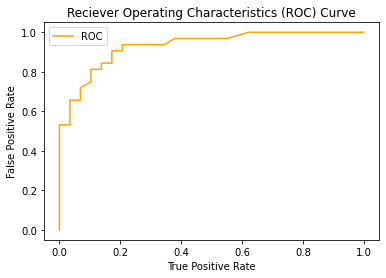

In [82]:
plot_roc_curve(fpr, tpr)

### Getting ROC_AUC_SCORE

In [83]:
from sklearn.metrics import roc_auc_score

In [84]:
roc_auc_score(y_test, y_predict_postitive)

0.9310344827586207

### Example: Visualization of Perfect ROC

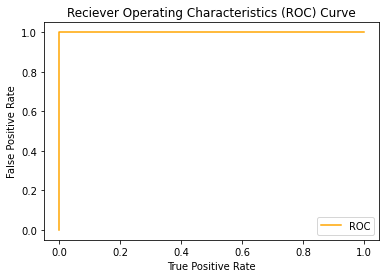

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_test) # for demo purpose, compare against y_test with y_test
plot_roc_curve(fpr, tpr)

In [87]:
roc_auc_score(y_test, y_test)

# perfect roc auc score is 1.0 with above chart

1.0

-------

# 4.2.3) Confusion Matrix

* a quick way to compare the labels that model predicts and actual label it was supposed to predict.
* in essence, it gives you an idea of where the model is getting confused.

In [92]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [98]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [94]:
confusion_matrix(y_test, y_pred)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [100]:
pd.crosstab(y_test, y_pred, rownames=['Predicted Labels'], colnames=['True Labels'])

True Labels,0,1
Predicted Labels,,
0,24,5
1,4,28


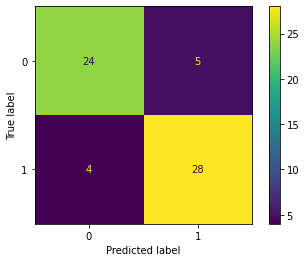

In [96]:
plot_confusion_matrix(rfc, X_test, y_test);

-------

## 4.2.4) Classification Report

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* **Recall**  - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
*F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* **Support**  - The number of samples each metric was calculated on.

* **Accuracy**  - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.

* **Macro avg**  - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.

* **Weighted avg**  - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class

In [101]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### When should we should those reports?

### Example: let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

In [105]:
# where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1  # only 1 positive case in the whole population

In [107]:
disease_predictions = np.zeros(10000) # let's assume our model predict every cases as Zero (no disease)

In [111]:
pd.DataFrame(classification_report(disease_true, disease_predictions, output_dict=True)).transpose()

C:\Users\Phone Thiri Yadana\.conda\envs\venv-datascience\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
0.0,0.99990,1.0000,0.999950,9999.0000
1.0,0.00000,0.0000,0.000000,1.0000
accuracy,0.99990,0.9999,0.999900,0.9999
macro avg,0.49995,0.5000,0.499975,10000.0000
weighted avg,0.99980,0.9999,0.999850,10000.0000


---------------

# <a name='4.3'>4.3) Evaluating Regression Model and Evaluation Metrics</a>